# <center>Admission Probability Prediction</center>

## 1. Introduction

**Objective**<br/>
It's an anxious feeling to wait for the graduation admission status for any student once they apply. University accepts the admission based on various parameters of the student. The predictive model will decide the probabiliy of getting an admission.

**Data Description**<br/>
The dataset contains student's GRE Score, TOEFL Score, University Rating, Statement of purpose score, Letter of recomendation score, CGPA, Whether the student has done any research or not and Chances of getting admission.

## 2. Exploratory Data Analysis (EDA)

### 2.1 Import libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
import xgboost
%matplotlib inline

print(os.listdir("../input/"))
os.chdir("../input/")

['Admission_Predict.csv', 'Admission_Predict_Ver1.1.csv']


### 2.2 Import Dataset

In [2]:
df = pd.read_csv('Admission_Predict_Ver1.1.csv')
print(df.head())
df.drop('Serial No.', axis = 1, inplace = True)

   Serial No.  GRE Score        ...         Research  Chance of Admit 
0           1        337        ...                1              0.92
1           2        324        ...                1              0.76
2           3        316        ...                1              0.72
3           4        322        ...                1              0.80
4           5        314        ...                0              0.65

[5 rows x 9 columns]


Since the column Serial No is insignificant, it should be droppped

In [3]:
print(f'Dataset contains {df.shape[0]} samples, {df.shape[1] - 1} independent features 1 target continuous variable.')

Dataset contains 500 samples, 7 independent features 1 target continuous variable.


### 2.3 Basic Analysis on the dataset

In [4]:
print(df.info())

missing_values = (df.isnull().sum() / len(df)) * 100
print("\nFeatures with missing values: \n", missing_values[missing_values > 0])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.3 KB
None

Features with missing values: 
 Series([], dtype: float64)


* All the independent features in the dataset are numeric.
* The target variable 'Chance of Admit' is a floating point number.
* There is no feature with missing values.

In [5]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


* Data description show there is no outliers in any features.

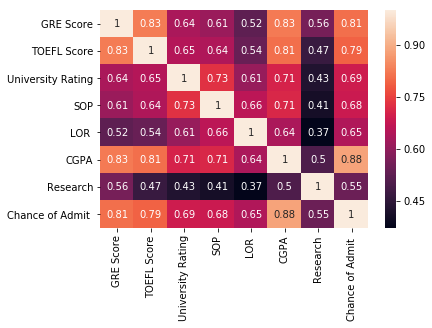

In [6]:
sns.heatmap(df.corr(), annot = True)

* The heatmap shows Chances of Admission is depends mostly on CGPA, GRE Score and TOEFL Score.
* Whether the student has done research or not doesn't affect the Chances of admission much.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


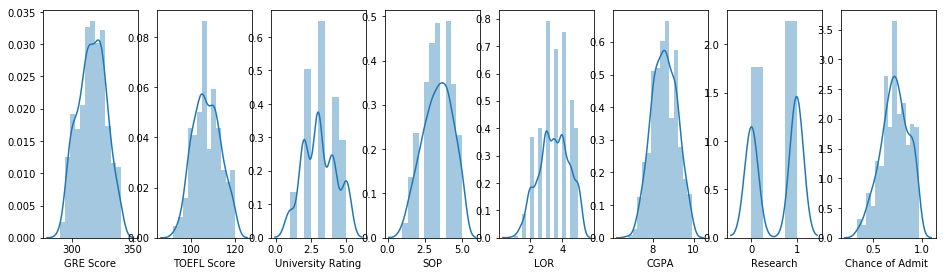

In [7]:
l = df.columns.values
number_of_columns=df.shape[1]
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize=(2*number_of_columns,5*number_of_rows))
for i in range(0,len(l)):
    plt.subplot(number_of_rows + 1,number_of_columns,i+1)
    sns.distplot(df[l[i]],kde=True) 

* Almost all the features are normally distributed.

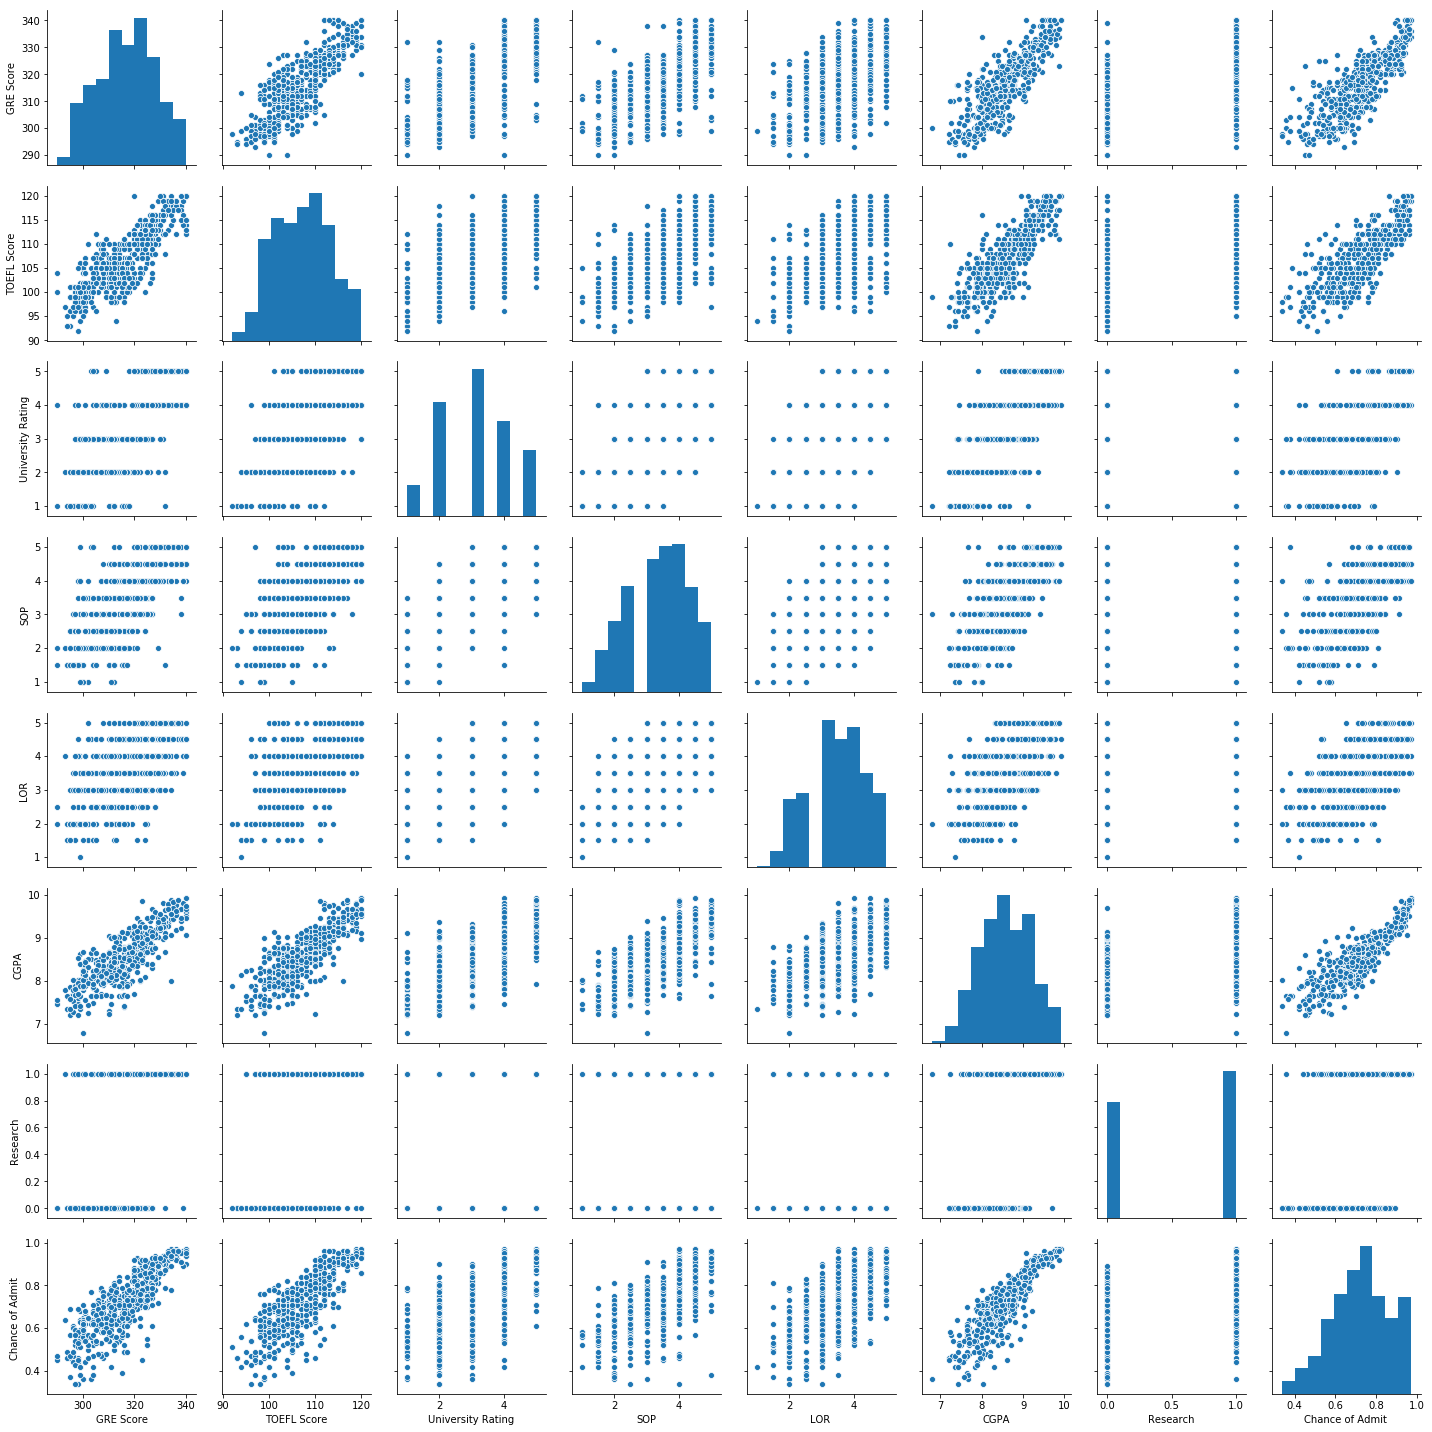

In [8]:
sns.pairplot(df)

EDA Conclussion: The features CGPA, GRE Score and TOEFL Score have more linear relationship with Chances of Admission. Hence we will be using only these three features and eliminating the rest of the features.

## 3. Data Pre Processing

Before training the model for the dataset, the following preprocessing steps will be under taken with the dataset.

* Independent and target data will be seperated as X and Y.
* Data will be split into train and test set with test set size 20%.
* Feature scalling will be done on independent features to standarize them.

In [9]:
X = df[['CGPA', 'GRE Score', 'TOEFL Score']].values
Y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

##  4. Build the model

Since the selected features have more linear relationship with the target variable, Multiple linear regression model will be used to train the dataset and predict the chances of getting admission.

In [10]:
# Linear Regression
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x_train, y_train)

# XGBoost
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(x_train, y_train)

# Random Forest
from sklearn.ensemble import RandomForestRegressor
rand_forest_reg = RandomForestRegressor()
rand_forest_reg.fit(x_train, y_train)

/opt/conda/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

## 5. Model Evaluation

### 4.1 Adjusted R Squared Score

In [11]:
from sklearn.metrics import r2_score
y_pred_lin_reg = reg.predict(x_test)
y_pred_xgb = xgb_reg.predict(x_test)
y_pred_rf = rand_forest_reg.predict(x_test)
print(f"Adjusted R Squared Score for Linear Regression: {r2_score(y_test, y_pred_lin_reg)}")
print(f"Adjusted R Squared Score for XGBoost Regression: {r2_score(y_test, y_pred_xgb)}")
print(f"Adjusted R Squared Score for Random Forest: {r2_score(y_test, y_pred_rf)}")

Adjusted R Squared Score for Linear Regression: 0.7394670499693268
Adjusted R Squared Score for XGBoost Regression: 0.7291417905145817
Adjusted R Squared Score for Random Forest: 0.6859620090353632


### 4.2 K-Fold Cross Validation

In [12]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(reg, x_train, y_train, cv = 6)
print(np.char.center("Linear Regression Score", 40, fillchar = '*'))
print("Scores: ", scores)
print("Accuracy: ", scores.mean() * 100, "%")
print("Standard Deviation: +/-", scores.std(), "\n\n")

print(np.char.center("XGBoost Score", 40, fillchar = '*'))
scores = cross_val_score(xgb_reg, x_train, y_train, cv = 6)
print("Scores: ", scores)
print("Accuracy: ", scores.mean() * 100, "%")
print("Standard Deviation: +/-", scores.std(), "\n\n")

print(np.char.center("Random Forest Score", 40, fillchar = '*'))
scores = cross_val_score(rand_forest_reg, x_train, y_train, cv = 6)
print("Scores: ", scores)
print("Accuracy: ", scores.mean() * 100, "%")
print("Standard Deviation: +/-", scores.std())

********Linear Regression Score*********
Scores:  [0.758617   0.80436216 0.82311216 0.79401332 0.77564284 0.90683157]
Accuracy:  81.0429842767701 %
Standard Deviation: +/- 0.04770597042401735 


*************XGBoost Score**************
Scores:  [0.75271087 0.79410319 0.82754261 0.74730225 0.69647233 0.89420102]
Accuracy:  78.53887135388605 %
Standard Deviation: +/- 0.0634002559993974 


**********Random Forest Score***********
Scores:  [0.74647245 0.75251482 0.80919887 0.70971077 0.65220058 0.89361306]
Accuracy:  76.0618425277272 %
Standard Deviation: +/- 0.07600375820070181


## 6. Conclussion

Linear regression model will be chosen as the suitable model for this problem